In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from collections import defaultdict
import matplotlib.pyplot as plt
from gensim.models.keyedvectors import KeyedVectors
from sklearn.cluster import KMeans
from gensim.models.word2vec import Word2Vec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [2]:
mc_codes = pd.read_csv("./datasets/transactions/tr_mcc_codes.csv", sep=";")

In [3]:
with open("out_file.txt", "r") as f:
    lines = f.readlines()
    l = []
    for line in lines:
        l.append(line.split())

In [4]:
def plot_mcc2vec(size, window):
    model = Word2Vec(l, size=200, window=3, min_count=5, workers=4, seed=1)

    clu = []
    for i in range(len(mc_codes)):
        clu.append(model.wv[str(mc_codes["mcc_code"][i])])

    kmeans = KMeans(n_clusters=20, random_state=1).fit(clu)
    da = [[] for i in range(kmeans.n_clusters)]

    for i in range(len(kmeans.labels_)):
        da[kmeans.labels_[i]].append(mc_codes["mcc_description"][i])

    vectors_cluster = [[] for i in range(kmeans.n_clusters)]
    for i in range(len(kmeans.labels_)):
        vectors_cluster[kmeans.labels_[i]].append(clu[i])

    pca = PCA(n_components=2, random_state=1)
    Y = pca.fit_transform(clu)
    Y_cluster = [[] for i in range(kmeans.n_clusters)]
    for i in range(len(kmeans.labels_)):
        Y_cluster[kmeans.labels_[i]].append(Y[i])
    for YY in Y_cluster:
        plt.scatter([x[0] for x in YY], [x[1] for x in YY])
    plt.legend
    plt.show()

    pca = PCA(n_components=3, random_state=1)
    Y = pca.fit_transform(clu)
    Y_cluster = [[] for i in range(kmeans.n_clusters)]
    for i in range(len(kmeans.labels_)):
        Y_cluster[kmeans.labels_[i]].append(Y[i])

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    for YY in Y_cluster:
        ax.scatter([x[0] for x in YY], [x[1] for x in YY], [x[2] for x in YY])
        ax.view_init(elev=20, azim=45)
    plt.show()
    return da

window 20


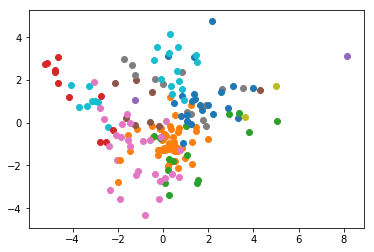

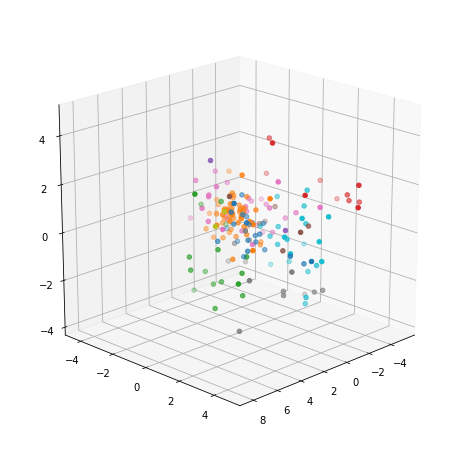

window 25


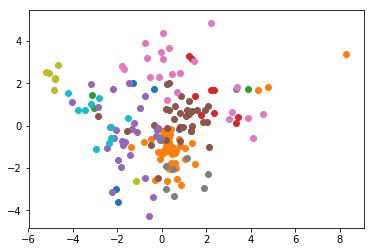

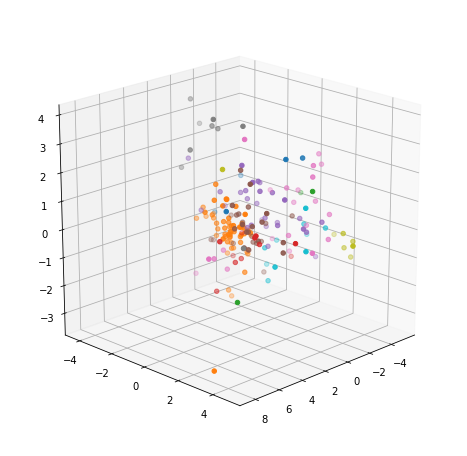

window 30


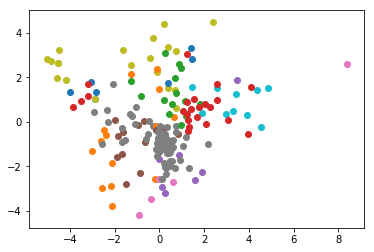

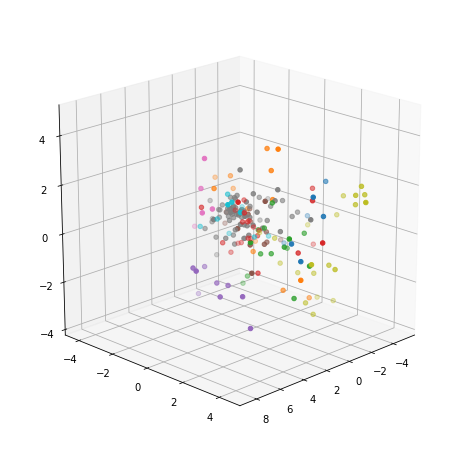

window 35


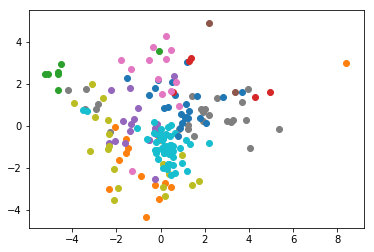

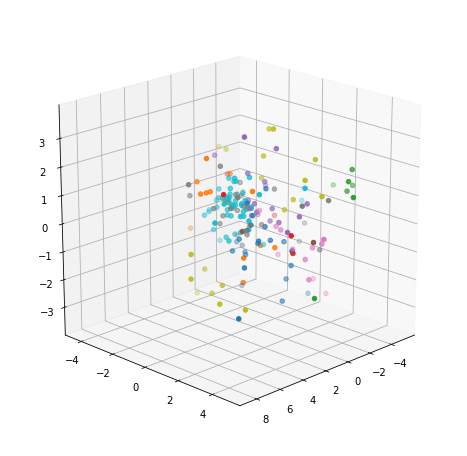

In [9]:
for window in range(20, 40, 5):
    print("window {}".format(window))
    da = plot_mcc2vec(size=100, window=window)

In [12]:
da

[['Аптеки',
  'Зоомагазины',
  'Салоты красоты и парикмахерские',
  'Центры здоровья',
  'Клубы — сельские клубы, членство(спортивный, отдых, спорт), частные поля для гольфа',
  'Доктора, нигде ранее не классифицируемые',
  'Дантисты, ортодонтисты',
  'Больницы',
  'Зубные и медицинские лаборатории',
  'Практикующие врачи, медицинские услуги, нигде ранее не классифицируемые'],
 ['Готовая женская одежда',
  'Аксессуары для женщин',
  'Одежда для всей семьи',
  'Магазины мужской и женской одежды',
  'Различные магазины одежды и аксессуаров'],
 ['Магазины second hand, магазины б/у товаров, комиссионки'],
 ['Поставщики грузовиков и запчастей',
  'Легковой и грузовой транспорт — продажа, сервис, ремонт, запчасти и лизинг',
  'Автошины',
  'Автозапчасти и аксессуары',
  'Станции техобслуживания',
  'Горючее топливо — уголь, нефть, разжиженный бензин, дрова',
  'СТО общего назначения',
  'Автомойки'],
 ['Магазины звукозаписи', 'Принадлежности для видеоигр'],
 ['Универсальные магазины'],
 ['Ав